In [44]:
import os
import numpy as np

In [9]:
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
import corner as dfm
import matplotlib.patches as mpatches
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
# read GSWLC data: https://salims.pages.iu.edu/gswlc/#catalog-download
# data column details: https://salims.pages.iu.edu/gswlc/table2.pdf
fgswlc = os.path.join(os.environ['GALPOPFM_DIR'], 'obs', 'GSWLC-M2.dat')
gswlc = np.loadtxt(fgswlc, unpack=True)

In [5]:
logm = gswlc[9]
logsfr = gswlc[11]
logssfr = logsfr-logm
Av = gswlc[17]

In [6]:
has_Av = (Av != -99.)
mlim = (logm > 10.)

cuts = has_Av & mlim

is_q = (logsfr < logm - 11.5)
is_sf = (logsfr > logm - 11.5)

(-4.2, 3.2)

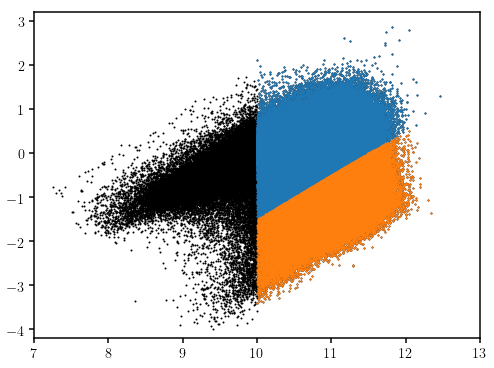

In [7]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(logm, logsfr, s=1, c='k')
sub.scatter(logm[cuts & is_sf], logsfr[cuts & is_sf], s=1)
sub.scatter(logm[cuts & is_q], logsfr[cuts & is_q], s=1)
sub.set_xlim(7, 13)
sub.set_ylim(-4.2, 3.2)

(0.0, 2.0)

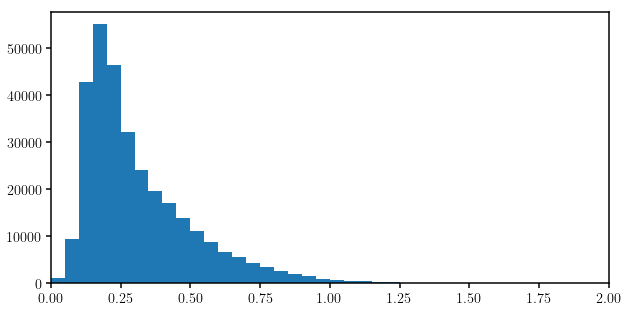

In [8]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.hist(Av[cuts], range=(0., 2.), bins=40)
sub.set_xlim(0., 2.)

(0, 2.0)

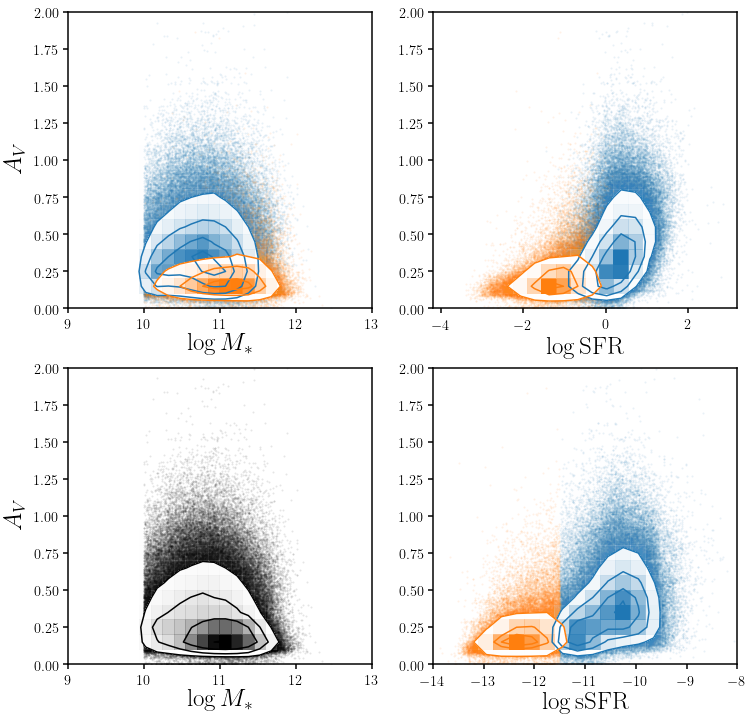

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
dfm.hist2d(logm[cuts & is_sf], Av[cuts & is_sf], range = [[9.5,12.5],[0,2]], ax = ax1, color = 'C0')
dfm.hist2d(logm[cuts & is_q], Av[cuts & is_q], range = [[9.5,12.5],[0,2]], ax = ax1, color = 'C1')
ax1.set_xlabel('$\log M_*$', fontsize=25)
ax1.set_xlim(9, 13)
ax1.set_ylabel('$A_V$', fontsize=25)
ax1.set_ylim(0, 2.)

dfm.hist2d(logsfr[cuts & is_sf], Av[cuts & is_sf], range = [[-4,3],[0,2]], ax = ax2, color = 'C0')
dfm.hist2d(logsfr[cuts & is_q], Av[cuts & is_q], range = [[-4,3],[0,2]], ax = ax2, color = 'C1')
ax2.set_xlabel(r'$\log {\rm SFR}$', fontsize=25)
ax2.set_xlim(-4.2, 3.2)
ax2.set_ylim(0, 2.)

dfm.hist2d(logm[cuts], Av[cuts], range = [[9.5,12.5],[0,2]], ax = ax3, color = 'k')
ax3.set_xlabel('$\log M_*$', fontsize=25)
ax3.set_xlim(9, 13)
ax3.set_ylabel('$A_V$', fontsize=25)
ax3.set_ylim(0, 2.)

dfm.hist2d(logssfr[cuts & is_sf], Av[cuts & is_sf], range = [[-14,-8],[0,2]], ax = ax4, color = 'C0')
dfm.hist2d(logssfr[cuts & is_q], Av[cuts & is_q], range = [[-14,-8],[0,2]], ax = ax4, color = 'C1')
ax4.set_xlabel(r'$\log {\rm sSFR}$', fontsize=25)
ax4.set_xlim(-14, -8)
ax4.set_ylim(0, 2.)

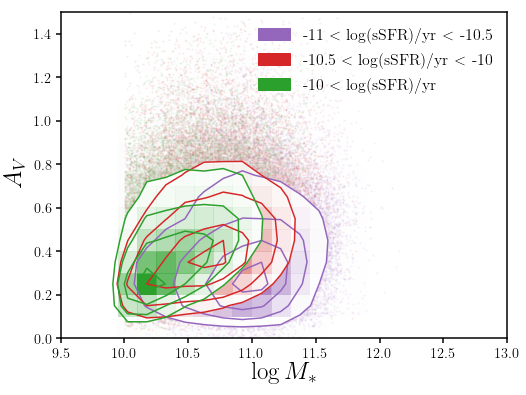

In [43]:
ssfrsel1 = (logssfr > -10)
ssfrsel2 = (logssfr > -10.5) & (logssfr < -10)
ssfrsel3 = (logssfr > -11) & (logssfr < -10.5)
fig, ax = plt.subplots(1, 1, figsize=(8,6))
dfm.hist2d(logm[cuts & ssfrsel3], Av[cuts & ssfrsel3], range = [[9.5,12.5],[0,2]], 
           ax = ax, color = 'C4')
dfm.hist2d(logm[cuts & ssfrsel2], Av[cuts & ssfrsel2], range = [[9.5,12.5],[0,2]], 
           ax = ax, color = 'C3')
dfm.hist2d(logm[cuts & ssfrsel1], Av[cuts & ssfrsel1], range = [[9.5,12.5],[0,2]], 
           ax = ax, color = 'C2')
ax.set_xlabel('$\log M_*$', fontsize=25)
ax.set_xlim(9.5, 13)
ax.set_ylabel('$A_V$', fontsize=25)
ax.set_ylim(0, 1.5)

patch1 = mpatches.Patch(color='C4', label='-11 $<$ log(sSFR)/yr $<$ -10.5')
patch2 = mpatches.Patch(color='C3', label='-10.5 $<$ log(sSFR)/yr $<$ -10')
patch3 = mpatches.Patch(color='C2', label='-10 $<$ log(sSFR)/yr')
ax.legend(handles=[patch1, patch2, patch3], fontsize = 16)